In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.dates import MonthLocator, DateFormatter

In [145]:
df = pd.read_csv("./data/daily_forex_rates.csv")

In [146]:
df

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,350.552056,2023-11-22
1,GHS,EUR,Ghanaian Cedi,12.996958,2023-11-22
2,HRK,EUR,Croatian Kuna,7.665963,2023-11-22
3,HNL,EUR,Honduran Lempira,26.867725,2023-11-22
4,HKD,EUR,Hong Kong Dollar,8.487236,2023-11-22
...,...,...,...,...,...
320848,AUD,EUR,Australian Dollar,1.731500,2004-09-01
320849,AUD,EUR,Australian Dollar,1.729600,2004-08-31
320850,JPY,EUR,Japanese Yen,132.850000,2004-08-31
320851,CAD,EUR,Canadian Dollar,1.596700,2004-08-31


In [58]:
df.shape

(320853, 5)

In [59]:
df.isna().sum()

currency         0
base_currency    0
currency_name    0
exchange_rate    0
date             0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320853 entries, 0 to 320852
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   currency       320853 non-null  object 
 1   base_currency  320853 non-null  object 
 2   currency_name  320853 non-null  object 
 3   exchange_rate  320853 non-null  float64
 4   date           320853 non-null  object 
dtypes: float64(1), object(4)
memory usage: 12.2+ MB


In [61]:
df["currency_name"].nunique() # 총 나라의 개수

168

In [62]:
df["currency_name"].unique()

array(['Zimbabwean Dollar', 'Ghanaian Cedi', 'Croatian Kuna',
       'Honduran Lempira', 'Hong Kong Dollar', 'Guyanaese Dollar',
       'Guatemalan Quetzal', 'Guinean Franc', 'Gambian Dalasi',
       'Gibraltar Pound', 'Guernsey Pound', 'Laotian Kip',
       'Georgian Lari', 'British Pound Sterling',
       'Falkland Islands Pound', 'Fijian Dollar', 'Euro',
       'Ethiopian Birr', 'Eritrean Nakfa', 'Egyptian Pound',
       'Haitian Gourde', 'Hungarian Forint', 'Indonesian Rupiah',
       'Israeli New Sheqel', 'Cayman Islands Dollar', 'Kuwaiti Dinar',
       'South Korean Won', 'North Korean Won', 'Comorian Franc',
       'Cambodian Riel', 'Kyrgystani Som', 'Kenyan Shilling',
       'Japanese Yen', 'Jordanian Dinar', 'Jamaican Dollar',
       'Jersey Pound', 'Icelandic Króna', 'Iranian Rial', 'Iraqi Dinar',
       'Indian Rupee', 'Manx pound', 'Algerian Dinar', 'Dominican Peso',
       'Danish Krone', 'Brazilian Real', 'Brunei Dollar',
       'Bermudan Dollar', 'Burundian Franc', 'Bahr

In [63]:
df.loc[df["currency_name"].str.contains("korea",case=False )]

,currency,base_currency,currency_name,exchange_rate,date
26,KRW,EUR,South Korean Won,1409.373051,2023-11-22
27,KPW,EUR,North Korean Won,979.857719,2023-11-22
250,KPW,EUR,North Korean Won,982.095220,2023-11-21
251,KRW,EUR,South Korean Won,1414.190302,2023-11-21
369,KRW,EUR,South Korean Won,1408.431201,2023-11-20
...,...,...,...,...,...
300960,KRW,EUR,South Korean Won,1361.300050,2014-11-13
300978,KRW,EUR,South Korean Won,1356.900020,2014-11-12
301058,KRW,EUR,South Korean Won,1365.199950,2014-11-11
301105,KRW,EUR,South Korean Won,1347.099980,2014-11-10


In [64]:
len(df["currency_name"].unique())

168

In [65]:
df

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,350.552056,2023-11-22
1,GHS,EUR,Ghanaian Cedi,12.996958,2023-11-22
2,HRK,EUR,Croatian Kuna,7.665963,2023-11-22
3,HNL,EUR,Honduran Lempira,26.867725,2023-11-22
4,HKD,EUR,Hong Kong Dollar,8.487236,2023-11-22
...,...,...,...,...,...
320848,AUD,EUR,Australian Dollar,1.731500,2004-09-01
320849,AUD,EUR,Australian Dollar,1.729600,2004-08-31
320850,JPY,EUR,Japanese Yen,132.850000,2004-08-31
320851,CAD,EUR,Canadian Dollar,1.596700,2004-08-31


In [66]:
df.loc[df["currency_name"] == "South Korean Won"]

,currency,base_currency,currency_name,exchange_rate,date
26,KRW,EUR,South Korean Won,1409.373051,2023-11-22
251,KRW,EUR,South Korean Won,1414.190302,2023-11-21
369,KRW,EUR,South Korean Won,1408.431201,2023-11-20
592,KRW,EUR,South Korean Won,1414.257704,2023-11-19
712,KRW,EUR,South Korean Won,1415.184533,2023-11-18
...,...,...,...,...,...
300960,KRW,EUR,South Korean Won,1361.300050,2014-11-13
300978,KRW,EUR,South Korean Won,1356.900020,2014-11-12
301058,KRW,EUR,South Korean Won,1365.199950,2014-11-11
301105,KRW,EUR,South Korean Won,1347.099980,2014-11-10


In [67]:
df.loc[(df["date"].values >= "2022-11-05") & (df["date"].values <= "2023-11-11")]

,currency,base_currency,currency_name,exchange_rate,date
1859,AUD,EUR,Australian Dollar,1.684450,2023-11-10
1860,GHS,EUR,Ghanaian Cedi,12.793676,2023-11-10
1861,ARS,EUR,Argentine Peso,373.839740,2023-11-10
1862,ZWL,EUR,Zimbabwean Dollar,345.010367,2023-11-10
1863,CZK,EUR,Czech Republic Koruna,24.598096,2023-11-10
...,...,...,...,...,...
36251,MDL,EUR,Moldovan Leu,19.298000,2022-11-07
36252,BBD,EUR,Barbadian Dollar,1.928100,2022-11-06
36253,CZK,EUR,Czech Republic Koruna,24.378500,2022-11-06
36254,MXN,EUR,Mexican Peso,19.423500,2022-11-06


In [147]:
df2 = df.loc[(df["currency_name"] == "South Korean Won") & (df["date"].values >= "2020-01-01") & (df["date"].values <= "2023-06-01")].sort_values("date")

In [148]:
df2

,currency,base_currency,currency_name,exchange_rate,date
129958,KRW,EUR,South Korean Won,1293.0,2020-01-01
129833,KRW,EUR,South Korean Won,1291.5,2020-01-02
129743,KRW,EUR,South Korean Won,1298.8,2020-01-03
129610,KRW,EUR,South Korean Won,1305.8,2020-01-06
129501,KRW,EUR,South Korean Won,1299.3,2020-01-07
...,...,...,...,...,...
18025,KRW,EUR,South Korean Won,1418.1,2023-05-26
17917,KRW,EUR,South Korean Won,1415.6,2023-05-29
17700,KRW,EUR,South Korean Won,1415.5,2023-05-30
17642,KRW,EUR,South Korean Won,1409.4,2023-05-31


In [162]:
for i in range(len(df2["date"])) :
    df2["date"].values[0][3]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [161]:
df2["date"].values[0]

'2020-01-01'

In [159]:
df2["date"].values[0][3]

'0'

In [131]:
df2.loc[df2["date"] < "2020-01-06"]

,currency,base_currency,currency_name,exchange_rate,date
129958,KRW,EUR,South Korean Won,1293.0,2020-01-01
129833,KRW,EUR,South Korean Won,1291.5,2020-01-02
129743,KRW,EUR,South Korean Won,1298.8,2020-01-03


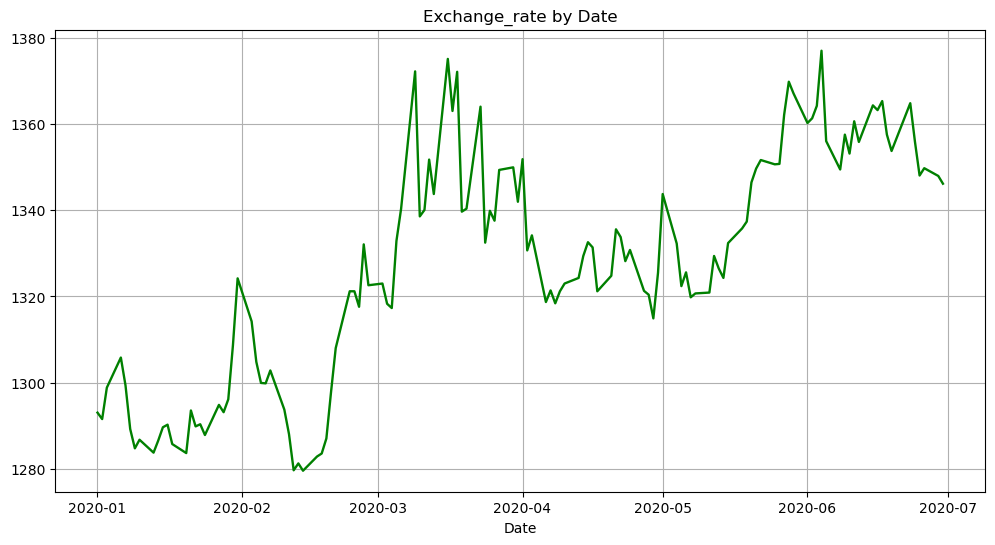

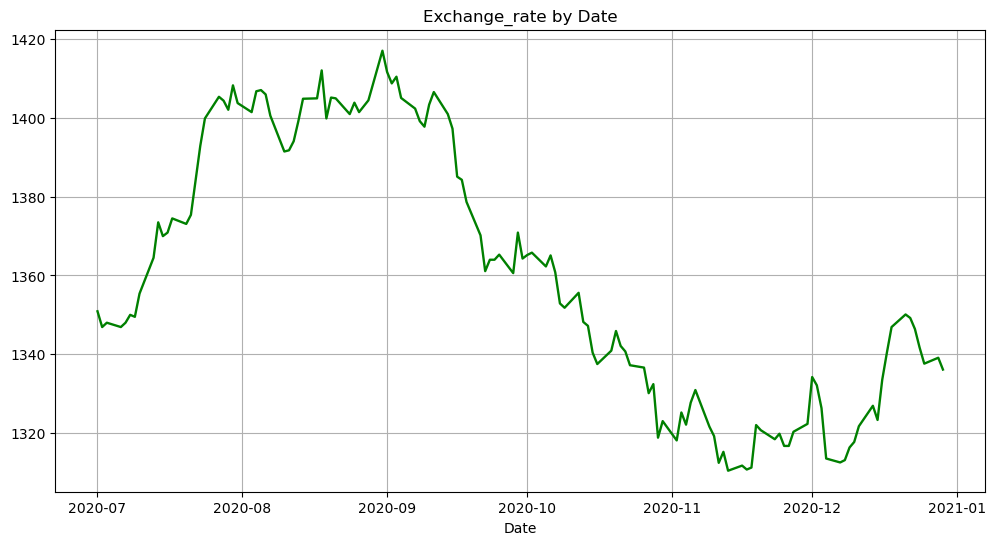

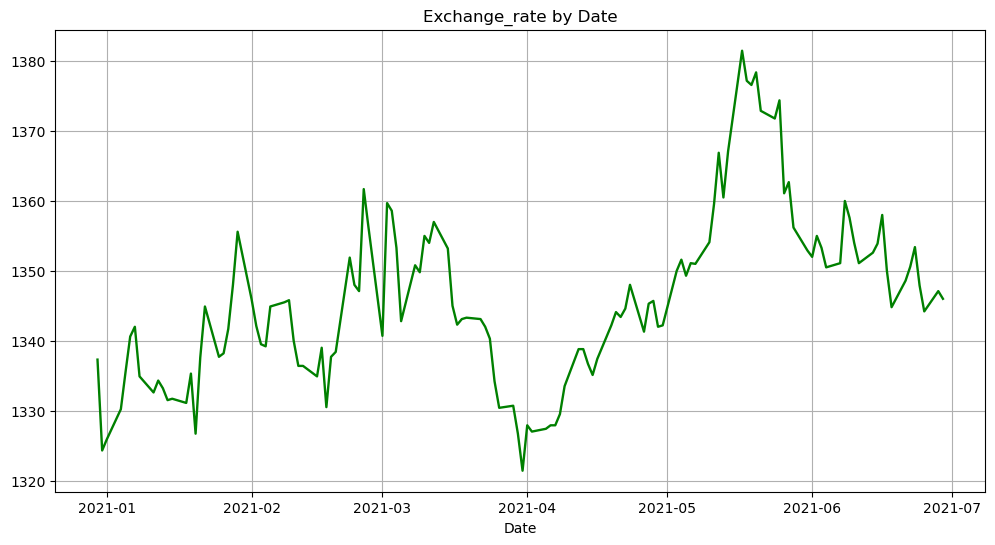

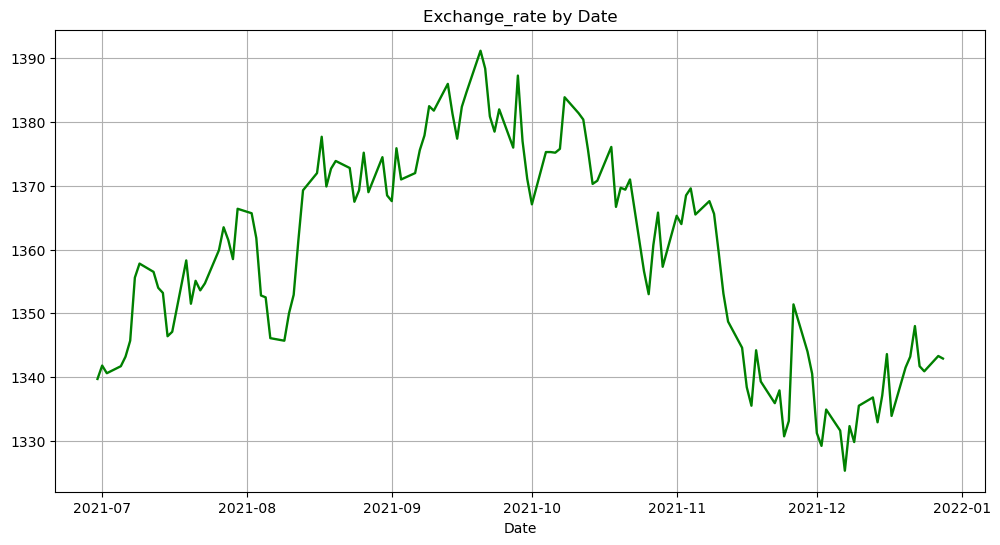

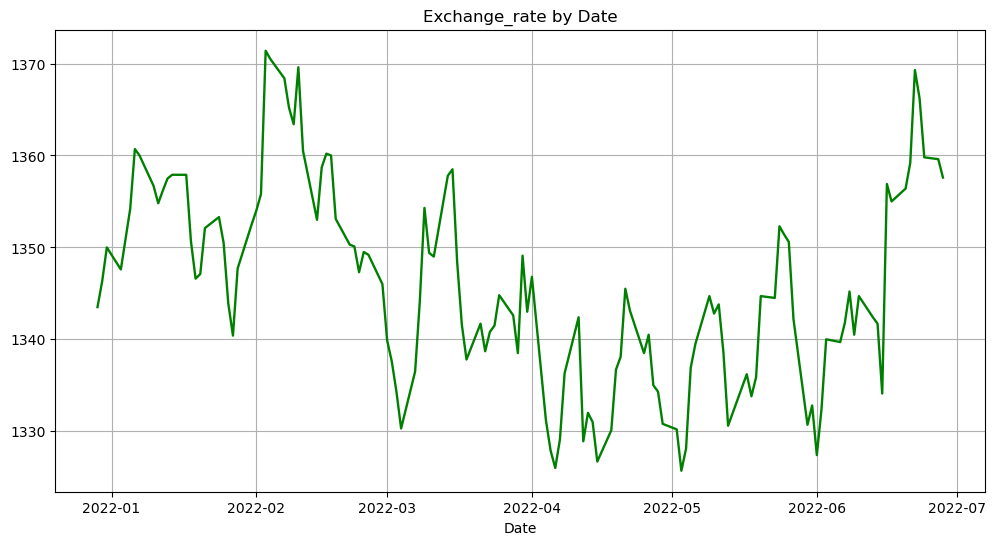

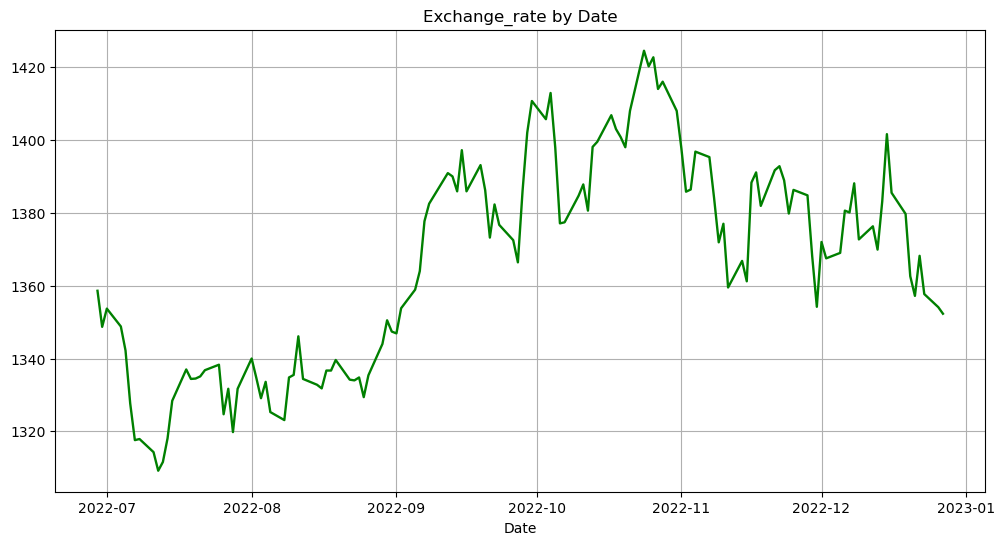

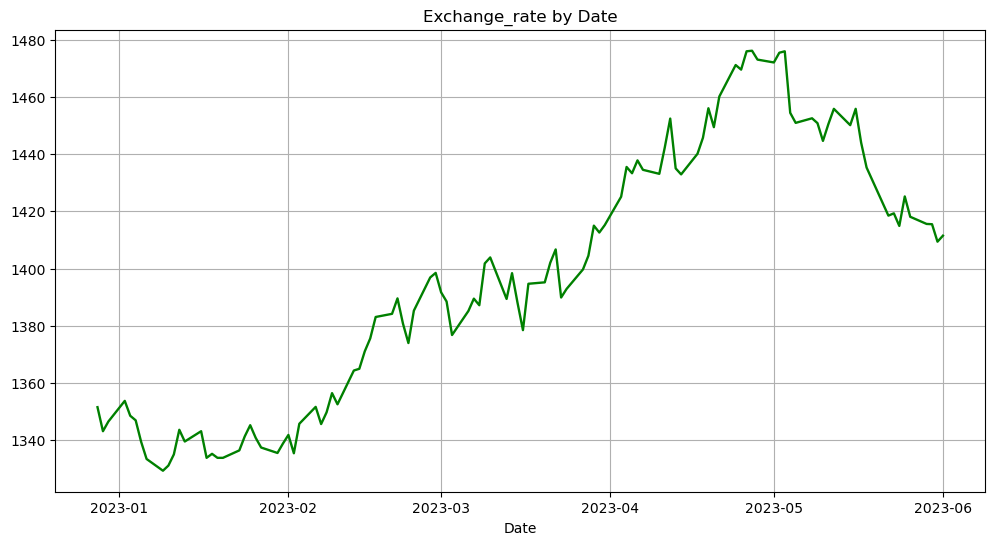

In [140]:
def plot_chart(start_idx , end_idx) :
        plt.figure(figsize=(12,6))
        plt.plot(df2["date"].iloc[start_idx : end_idx] ,df2["exchange_rate"].iloc[start_idx : end_idx], color="green", linewidth=1.7)
        plt.gca().xaxis.set_major_locator(months)
        plt.gca().xaxis.set_major_formatter(monFmt)

        plt.grid(True)
        plt.title("Exchange_rate by Date")
        plt.xlabel("Date")

n = len(df2["date"]) 

df2["date"] = pd.to_datetime(df2["date"]) # datetime 타입으로 변환
months = MonthLocator() # 1달씩 나오게
monFmt = DateFormatter('%Y-%m') # 표시 형식 포맷

if n % 130 == 0 : 
    count = n // 130 
                    
    if count == 1 :
        plot_chart(0, n)
        plt.show()
    else :
        for i in range(count) : 
            start_idx = i * 130
            end_idx = (i+1) * 130
            plot_chart(start_idx, end_idx)
            plt.show()
else :
    count = (n // 130) + 1
                        
    if count == 1 : 
        plot_chart(0, n)
        plt.show()
    else :
        for i in range(count-1) : 
            start_idx = i * 130
            end_idx = (i+1) * 130
            plot_chart(start_idx, end_idx)
            plt.show()
                
        start_idx = (count-1) * 130
        end_idx = n
        plot_chart(start_idx, n)
        plt.show()

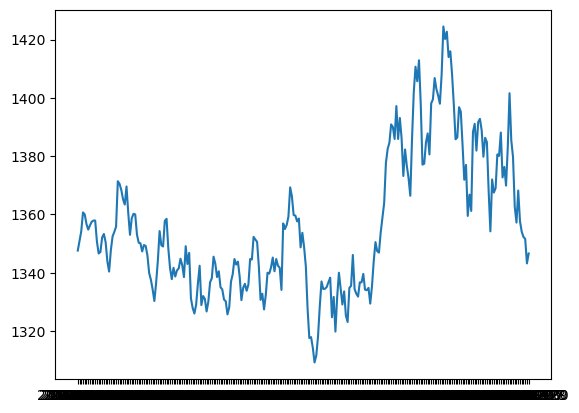

In [70]:
plt.plot(df2["date"], df2["exchange_rate"])
plt.show()

In [71]:
df2["date"]

64063    2022-01-03
63852    2022-01-04
63778    2022-01-05
63633    2022-01-06
63505    2022-01-07
            ...    
31773    2022-12-26
31564    2022-12-27
31442    2022-12-28
31323    2022-12-29
31251    2022-12-30
Name: date, Length: 260, dtype: object

In [72]:
array1 = df["currency"].unique()

In [73]:
array2 = df["currency_name"].unique()

In [74]:
currency_dict = dict(zip(array1, array2))
currency_dict

{'ZWL': 'Zimbabwean Dollar',
 'GHS': 'Ghanaian Cedi',
 'HRK': 'Croatian Kuna',
 'HNL': 'Honduran Lempira',
 'HKD': 'Hong Kong Dollar',
 'GYD': 'Guyanaese Dollar',
 'GTQ': 'Guatemalan Quetzal',
 'GNF': 'Guinean Franc',
 'GMD': 'Gambian Dalasi',
 'GIP': 'Gibraltar Pound',
 'GGP': 'Guernsey Pound',
 'LAK': 'Laotian Kip',
 'GEL': 'Georgian Lari',
 'GBP': 'British Pound Sterling',
 'FKP': 'Falkland Islands Pound',
 'FJD': 'Fijian Dollar',
 'EUR': 'Euro',
 'ETB': 'Ethiopian Birr',
 'ERN': 'Eritrean Nakfa',
 'EGP': 'Egyptian Pound',
 'HTG': 'Haitian Gourde',
 'HUF': 'Hungarian Forint',
 'IDR': 'Indonesian Rupiah',
 'ILS': 'Israeli New Sheqel',
 'KYD': 'Cayman Islands Dollar',
 'KWD': 'Kuwaiti Dinar',
 'KRW': 'South Korean Won',
 'KPW': 'North Korean Won',
 'KMF': 'Comorian Franc',
 'KHR': 'Cambodian Riel',
 'KGS': 'Kyrgystani Som',
 'KES': 'Kenyan Shilling',
 'JPY': 'Japanese Yen',
 'JOD': 'Jordanian Dinar',
 'JMD': 'Jamaican Dollar',
 'JEP': 'Jersey Pound',
 'ISK': 'Icelandic Króna',
 'IRR':

In [75]:
df.iloc[ : , [0,2]]

,currency,currency_name
0,ZWL,Zimbabwean Dollar
1,GHS,Ghanaian Cedi
2,HRK,Croatian Kuna
3,HNL,Honduran Lempira
4,HKD,Hong Kong Dollar
...,...,...
320848,AUD,Australian Dollar
320849,AUD,Australian Dollar
320850,JPY,Japanese Yen
320851,CAD,Canadian Dollar


In [76]:
df

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,350.552056,2023-11-22
1,GHS,EUR,Ghanaian Cedi,12.996958,2023-11-22
2,HRK,EUR,Croatian Kuna,7.665963,2023-11-22
3,HNL,EUR,Honduran Lempira,26.867725,2023-11-22
4,HKD,EUR,Hong Kong Dollar,8.487236,2023-11-22
...,...,...,...,...,...
320848,AUD,EUR,Australian Dollar,1.731500,2004-09-01
320849,AUD,EUR,Australian Dollar,1.729600,2004-08-31
320850,JPY,EUR,Japanese Yen,132.850000,2004-08-31
320851,CAD,EUR,Canadian Dollar,1.596700,2004-08-31


In [77]:
df.loc[(df["date"] == "2022-11-07") & (df["currency_name"].str.contains("korea",case=False)) ]

,currency,base_currency,currency_name,exchange_rate,date
36175,KRW,EUR,South Korean Won,1395.3,2022-11-07


In [78]:
df2.shape[0]

260

In [79]:
df2

,currency,base_currency,currency_name,exchange_rate,date
64063,KRW,EUR,South Korean Won,1347.6,2022-01-03
63852,KRW,EUR,South Korean Won,1350.9,2022-01-04
63778,KRW,EUR,South Korean Won,1354.2,2022-01-05
63633,KRW,EUR,South Korean Won,1360.7,2022-01-06
63505,KRW,EUR,South Korean Won,1360.0,2022-01-07
...,...,...,...,...,...
31773,KRW,EUR,South Korean Won,1354.1,2022-12-26
31564,KRW,EUR,South Korean Won,1352.3,2022-12-27
31442,KRW,EUR,South Korean Won,1351.6,2022-12-28
31323,KRW,EUR,South Korean Won,1343.2,2022-12-29


In [81]:
df2

,currency,base_currency,currency_name,exchange_rate,date
64063,KRW,EUR,South Korean Won,1347.6,2022-01-03
63852,KRW,EUR,South Korean Won,1350.9,2022-01-04
63778,KRW,EUR,South Korean Won,1354.2,2022-01-05
63633,KRW,EUR,South Korean Won,1360.7,2022-01-06
63505,KRW,EUR,South Korean Won,1360.0,2022-01-07
...,...,...,...,...,...
31773,KRW,EUR,South Korean Won,1354.1,2022-12-26
31564,KRW,EUR,South Korean Won,1352.3,2022-12-27
31442,KRW,EUR,South Korean Won,1351.6,2022-12-28
31323,KRW,EUR,South Korean Won,1343.2,2022-12-29


In [82]:
df["currency_name"].value_counts().index

Index(['Australian Dollar', 'Japanese Yen', 'Canadian Dollar', 'Swiss Franc',
       'British Pound Sterling', 'Hong Kong Dollar', 'New Zealand Dollar',
       'Chinese Yuan', 'Sierra Leonean Leone', 'Norwegian Krone',
       ...
       'CFP Franc', 'Latvian Lats', 'CFA Franc BCEAO', 'Gold (troy ounce)',
       'Silver (troy ounce)', 'Samoan Tala', 'United Arab Emirates Dirham',
       'Laotian Kip', 'Guernsey Pound', 'Kenyan Shilling'],
      dtype='object', name='currency_name', length=168)

In [83]:
df.loc[df["currency_name"].str.contains("ddsa", case=False)]

,currency,base_currency,currency_name,exchange_rate,date


In [84]:
df["currency_name"].value_counts().index

Index(['Australian Dollar', 'Japanese Yen', 'Canadian Dollar', 'Swiss Franc',
       'British Pound Sterling', 'Hong Kong Dollar', 'New Zealand Dollar',
       'Chinese Yuan', 'Sierra Leonean Leone', 'Norwegian Krone',
       ...
       'CFP Franc', 'Latvian Lats', 'CFA Franc BCEAO', 'Gold (troy ounce)',
       'Silver (troy ounce)', 'Samoan Tala', 'United Arab Emirates Dirham',
       'Laotian Kip', 'Guernsey Pound', 'Kenyan Shilling'],
      dtype='object', name='currency_name', length=168)

In [85]:
df

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,350.552056,2023-11-22
1,GHS,EUR,Ghanaian Cedi,12.996958,2023-11-22
2,HRK,EUR,Croatian Kuna,7.665963,2023-11-22
3,HNL,EUR,Honduran Lempira,26.867725,2023-11-22
4,HKD,EUR,Hong Kong Dollar,8.487236,2023-11-22
...,...,...,...,...,...
320848,AUD,EUR,Australian Dollar,1.731500,2004-09-01
320849,AUD,EUR,Australian Dollar,1.729600,2004-08-31
320850,JPY,EUR,Japanese Yen,132.850000,2004-08-31
320851,CAD,EUR,Canadian Dollar,1.596700,2004-08-31


In [86]:
df3 = df.groupby("currency_name")[["exchange_rate","date"]].agg([np.min, np.max])

In [87]:
df3.columns[0]

('exchange_rate', 'amin')

In [88]:
df3

exchange_rate                      date            
                                   amin          amax        amin        amax
currency_name                                                                
Afghan Afghani                60.152000    139.708000  2014-11-24  2023-11-22
Albanian Lek                  97.700000    138.000000  2014-11-10  2023-11-22
Algerian Dinar               100.933000    164.190000  2014-11-24  2023-11-22
Angolan Kwanza               875.362859    915.951295  2023-10-28  2023-11-22
Argentine Peso                 9.216000    388.447717  2014-11-24  2023-11-22
...                                 ...           ...         ...         ...
Vietnamese Dong            22428.000000  28614.000000  2014-11-07  2023-11-22
Yemeni Rial                  225.590000    312.480000  2014-11-24  2023-11-22
Zambian Kwacha                23.195041     25.425753  2023-10-28  2023-11-22
Zambian Kwacha (pre-2013)   9506.214249   9847.124031  2023-10-28  2023-11-22
Zimbabwean Dollar            338.724800    403.505400  2014-11-24  2023-11-22

[168 rows x 4 columns]

In [89]:
df.loc[df["currency_name"] == "South Korean Won"]

,currency,base_currency,currency_name,exchange_rate,date
26,KRW,EUR,South Korean Won,1409.373051,2023-11-22
251,KRW,EUR,South Korean Won,1414.190302,2023-11-21
369,KRW,EUR,South Korean Won,1408.431201,2023-11-20
592,KRW,EUR,South Korean Won,1414.257704,2023-11-19
712,KRW,EUR,South Korean Won,1415.184533,2023-11-18
...,...,...,...,...,...
300960,KRW,EUR,South Korean Won,1361.300050,2014-11-13
300978,KRW,EUR,South Korean Won,1356.900020,2014-11-12
301058,KRW,EUR,South Korean Won,1365.199950,2014-11-11
301105,KRW,EUR,South Korean Won,1347.099980,2014-11-10


In [90]:
df.loc[df["currency_name"] == "South Korean Won"].min().values[3:][0]

1157.80005

In [91]:
df.loc[df["currency_name"] == "South Korean Won"].max().values[3:][1]

'2023-11-22'

In [92]:
df.loc[df["currency_name"] == "South Korean Won"].max()

currency                      KRW
base_currency                 EUR
currency_name    South Korean Won
exchange_rate              1476.1
date                   2023-11-22
dtype: object

In [93]:
df

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,350.552056,2023-11-22
1,GHS,EUR,Ghanaian Cedi,12.996958,2023-11-22
2,HRK,EUR,Croatian Kuna,7.665963,2023-11-22
3,HNL,EUR,Honduran Lempira,26.867725,2023-11-22
4,HKD,EUR,Hong Kong Dollar,8.487236,2023-11-22
...,...,...,...,...,...
320848,AUD,EUR,Australian Dollar,1.731500,2004-09-01
320849,AUD,EUR,Australian Dollar,1.729600,2004-08-31
320850,JPY,EUR,Japanese Yen,132.850000,2004-08-31
320851,CAD,EUR,Canadian Dollar,1.596700,2004-08-31


In [94]:
df["currency_name"].str.split()

0         [Zimbabwean, Dollar]
1             [Ghanaian, Cedi]
2             [Croatian, Kuna]
3          [Honduran, Lempira]
4         [Hong, Kong, Dollar]
                  ...         
320848    [Australian, Dollar]
320849    [Australian, Dollar]
320850         [Japanese, Yen]
320851      [Canadian, Dollar]
320852    [Australian, Dollar]
Name: currency_name, Length: 320853, dtype: object

In [95]:
def split_cname(currency_name) :
    cname = currency_name.split()
    country = " ".join(cname[:-1])
    return  country , cname[-1]

In [96]:
df["currency_name"].apply(split_cname).values[74][0] 

'Chilean Unit of Account'

In [97]:
df["currency_name"].apply(split_cname).values[74][1]

'(UF)'

In [98]:
df.loc[df["currency_name"].str.split().str.len() >= 5]

,currency,base_currency,currency_name,exchange_rate,date
74,CLF,EUR,Chilean Unit of Account (UF),0.034387,2023-11-22
98,STD,EUR,São Tomé and Príncipe Dobra,22533.319848,2023-11-22
204,CLF,EUR,Chilean Unit of Account (UF),0.034400,2023-11-21
306,STD,EUR,São Tomé and Príncipe Dobra,22584.947979,2023-11-21
415,CLF,EUR,Chilean Unit of Account (UF),0.034824,2023-11-20
...,...,...,...,...,...
300081,CLF,EUR,Chilean Unit of Account (UF),0.030360,2014-11-28
300122,CLF,EUR,Chilean Unit of Account (UF),0.030060,2014-11-27
300241,CLF,EUR,Chilean Unit of Account (UF),0.030050,2014-11-26
300424,CLF,EUR,Chilean Unit of Account (UF),0.029970,2014-11-25


In [99]:
df

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,350.552056,2023-11-22
1,GHS,EUR,Ghanaian Cedi,12.996958,2023-11-22
2,HRK,EUR,Croatian Kuna,7.665963,2023-11-22
3,HNL,EUR,Honduran Lempira,26.867725,2023-11-22
4,HKD,EUR,Hong Kong Dollar,8.487236,2023-11-22
...,...,...,...,...,...
320848,AUD,EUR,Australian Dollar,1.731500,2004-09-01
320849,AUD,EUR,Australian Dollar,1.729600,2004-08-31
320850,JPY,EUR,Japanese Yen,132.850000,2004-08-31
320851,CAD,EUR,Canadian Dollar,1.596700,2004-08-31


In [100]:
#plt.hist(data= , x= , rwidth= , bins = )
#-> data = 차트화 시킬 데이터 프레임
#-> x = 차트화 시킬 컬럼명
#-> rwidth = 데이터들의 거리 비율(작을수록 커짐)
#-> bins = 빈 개수 어떻게 할건지

In [101]:
df2

,currency,base_currency,currency_name,exchange_rate,date
64063,KRW,EUR,South Korean Won,1347.6,2022-01-03
63852,KRW,EUR,South Korean Won,1350.9,2022-01-04
63778,KRW,EUR,South Korean Won,1354.2,2022-01-05
63633,KRW,EUR,South Korean Won,1360.7,2022-01-06
63505,KRW,EUR,South Korean Won,1360.0,2022-01-07
...,...,...,...,...,...
31773,KRW,EUR,South Korean Won,1354.1,2022-12-26
31564,KRW,EUR,South Korean Won,1352.3,2022-12-27
31442,KRW,EUR,South Korean Won,1351.6,2022-12-28
31323,KRW,EUR,South Korean Won,1343.2,2022-12-29


In [104]:
df2

,currency,base_currency,currency_name,exchange_rate,date
64063,KRW,EUR,South Korean Won,1347.6,2022-01-03
63852,KRW,EUR,South Korean Won,1350.9,2022-01-04
63778,KRW,EUR,South Korean Won,1354.2,2022-01-05
63633,KRW,EUR,South Korean Won,1360.7,2022-01-06
63505,KRW,EUR,South Korean Won,1360.0,2022-01-07
...,...,...,...,...,...
31773,KRW,EUR,South Korean Won,1354.1,2022-12-26
31564,KRW,EUR,South Korean Won,1352.3,2022-12-27
31442,KRW,EUR,South Korean Won,1351.6,2022-12-28
31323,KRW,EUR,South Korean Won,1343.2,2022-12-29


In [105]:
df.loc[df["date"] == "2023-01-02"]

,currency,base_currency,currency_name,exchange_rate,date
31062,PGK,EUR,Papua New Guinean Kina,3.75780,2023-01-02
31063,NPR,EUR,Nepalese Rupee,141.32600,2023-01-02
31064,BDT,EUR,Bangladeshi Taka,110.38800,2023-01-02
31065,HNL,EUR,Honduran Lempira,26.21500,2023-01-02
31066,NOK,EUR,Norwegian Krone,10.50917,2023-01-02
...,...,...,...,...,...
31169,KWD,EUR,Kuwaiti Dinar,0.32673,2023-01-02
31170,NAD,EUR,Namibian Dollar,18.10300,2023-01-02
31171,BND,EUR,Brunei Dollar,1.42930,2023-01-02
31172,KHR,EUR,Cambodian Riel,4382.70000,2023-01-02


In [106]:
# 사용자 입력을 받는다.
# 날짜 1개, 나라 두개
# 정한 날을 기준으로 1유로당 두 나라의 환율이 나온다.

In [107]:
df

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,350.552056,2023-11-22
1,GHS,EUR,Ghanaian Cedi,12.996958,2023-11-22
2,HRK,EUR,Croatian Kuna,7.665963,2023-11-22
3,HNL,EUR,Honduran Lempira,26.867725,2023-11-22
4,HKD,EUR,Hong Kong Dollar,8.487236,2023-11-22
...,...,...,...,...,...
320848,AUD,EUR,Australian Dollar,1.731500,2004-09-01
320849,AUD,EUR,Australian Dollar,1.729600,2004-08-31
320850,JPY,EUR,Japanese Yen,132.850000,2004-08-31
320851,CAD,EUR,Canadian Dollar,1.596700,2004-08-31


In [108]:
df2 = df.loc[(df["currency_name"] == "North Korean Won") & (df["date"] == "2023-11-11")]

In [109]:
df3 = df.loc[(df["currency_name"] == "South Korean Won") & (df["date"] == "2023-11-1")]

In [110]:
df2

,currency,base_currency,currency_name,exchange_rate,date


In [111]:
df3

,currency,base_currency,currency_name,exchange_rate,date


In [112]:
df.loc[(df["currency_name"] == "North Korean Won") & (df["date"] != "2023-11-18")]

,currency,base_currency,currency_name,exchange_rate,date
27,KPW,EUR,North Korean Won,979.857719,2023-11-22
250,KPW,EUR,North Korean Won,982.095220,2023-11-21
370,KPW,EUR,North Korean Won,984.580376,2023-11-20
591,KPW,EUR,North Korean Won,981.756905,2023-11-19
932,KPW,EUR,North Korean Won,982.433884,2023-11-17
1056,KPW,EUR,North Korean Won,976.783075,2023-11-16
1273,KPW,EUR,North Korean Won,976.490762,2023-11-15
1409,KPW,EUR,North Korean Won,979.359850,2023-11-14
1569,KPW,EUR,North Korean Won,961.778025,2023-11-13
1799,KPW,EUR,North Korean Won,964.319398,2023-11-12


In [ ]:
df3["exchange_rate"].values[0]

In [ ]:
won = 1335.1
yen = 142.494

won / won , round(yen / 1335.1, 2)

In [ ]:
a = 142.494
b = 1335.1

a / a , round(b / a , 2) 

In [ ]:
from datetime import datetime

In [ ]:
now_time = datetime.now().strftime("%Y-%m-%d")
now_time